# Task 4. Prior predictive checks
1. Plot lines for each sampled slope beta and intercept alpha, verify if possible predicted heights are consistent with minimum (0) and maximum (check Wikipedia) heights observed in nature.

In [1]:
from cmdstanpy import CmdStanModel
import seaborn as sns
import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
_BASE_URL = "https://raw.githubusercontent.com/rmcelreath/rethinking/Experimental/data"
HOWELL_DATASET_PATH = f"{_BASE_URL}/Howell1.csv"
d = pd.read_csv(HOWELL_DATASET_PATH, sep=';', header=0)
d=d[d.age>=18] #just adults 
d.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


### Adding predictor to the model - weight

In [3]:
weight = d['weight']
mean_weight = weight.mean()
c_weight = weight-mean_weight
d['c_weight'] = c_weight
d

,height,weight,age,male,c_weight
0,151.765,47.825606,63.0,1,2.835121
1,139.700,36.485807,63.0,0,-8.504679
2,136.525,31.864838,65.0,0,-13.125648
3,156.845,53.041914,41.0,1,8.051429
4,145.415,41.276872,51.0,0,-3.713614
...,...,...,...,...,...
534,162.560,47.031821,27.0,0,2.041335
537,142.875,34.246196,31.0,0,-10.744290
540,162.560,52.163080,31.0,1,7.172594
541,156.210,54.062497,21.0,0,9.072011


In [4]:
model_ppc=CmdStanModel(stan_file='height_2a_ppc.stan')
R = 1000
data_sim={'N':50, 'weight':np.linspace(d.c_weight.min(),d.c_weight.max())}
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0,
                     chains=1,
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [5]:
df = sim.draws_pd()
df

,lp__,accept_stat__,alpha,beta,sigma,height[1],height[2],height[3],height[4],height[5],...,height[41],height[42],height[43],height[44],height[45],height[46],height[47],height[48],height[49],height[50]
0,0.0,0.0,232.163,7.771810,23.208300,126.94500,96.801100,139.82300,166.9940,196.8110,...,353.4910,375.26600,372.3590,347.72600,314.6710,339.3220,350.56700,379.6720,373.6310,387.0100
1,0.0,0.0,154.022,-0.067795,0.086958,155.07100,154.987000,154.94100,154.9350,154.8940,...,153.4310,153.15200,153.0320,153.05200,152.9390,153.0230,152.84300,152.8810,152.9590,152.7940
2,0.0,0.0,169.461,-11.386400,20.358900,356.79100,316.703000,309.85300,318.0190,306.3020,...,66.8444,-3.16095,47.2156,15.83240,41.4377,-5.6454,6.99248,-11.5414,-28.9123,-31.1721
3,0.0,0.0,158.357,-2.544520,6.415610,202.30200,187.885000,189.06300,182.6860,185.7290,...,131.0530,126.80500,126.6680,131.70300,118.0180,116.1060,123.25000,112.7940,116.8110,110.2640
4,0.0,0.0,158.131,16.710200,9.955320,-100.45100,-69.466400,-60.49660,-49.5101,-18.0338,...,376.6260,384.91100,375.4720,395.41000,403.1500,410.9170,421.00300,444.7230,453.7910,450.8480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,161.753,12.613000,6.017940,-7.87544,-15.199900,3.22795,11.0229,20.4256,...,318.4510,308.48800,336.5390,337.59100,363.7580,354.3510,364.04200,385.2460,378.0560,382.7440
996,0.0,0.0,196.362,12.233800,10.413300,33.05540,40.535000,37.66820,51.9102,43.8187,...,339.9760,358.67800,366.2430,350.95600,386.1040,380.2760,371.39400,414.6350,405.2070,414.6210
997,0.0,0.0,172.792,-2.720510,76.805200,173.24400,305.016000,268.28800,213.3710,226.8800,...,89.3935,104.94800,182.1620,-3.85361,141.5600,194.4090,41.88970,149.7670,64.7706,86.5153
998,0.0,0.0,126.115,9.871600,23.204300,9.44286,0.718556,-2.69116,20.8659,43.9140,...,239.1950,247.65300,214.9920,245.44600,297.4530,273.0670,311.30900,265.8820,265.4140,308.8210


Min:  -311.0519999999999
Max:  203.609


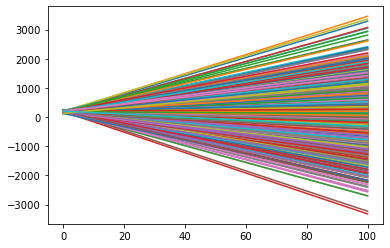

In [8]:
x = np.array([0,100])

for i in range(len(df)):
    y = df['beta'][i]*x + df['alpha'][i]
    plt.plot(x, y)

print('Min: ', np.min(y))
print('Max: ', np.max(y))
    